In [11]:
Time=[]
for i in range(1,100000,1):
    Time.append(i*2e-3)
    
omega=np.linspace(0,3*math.pi,num=1000)

# Графики h(t), ЛАЧХ, ЛФЧХ

In [12]:
def Grafiki(w6):
    #Нули функции
    pzmap(w6)
    #Переходная функция

    y,x=step(w6,Time)
    plt.figure(figsize=SIZE)
    plt.grid(True)
    plt.plot(x,y)

    #АЧХ и ФЧХ
    w7=series(w5,w1)
    plt.figure(figsize=SIZE)
    bode(w7,dB=False)
    plt.show()

# Критерий Найквиста

In [13]:
def Nyquist(w5,w1):
    w7=series(w5,w1)
    omega=np.linspace(0.5,5,num=1000)
    plt.figure(figsize=SIZE)
    real, imag, freq = nyquist(w7,omega)

    plt.show()

# Построение матрицы для критерия Гурвица

In [14]:
import numpy as np

def Gurvic(w6,fullInform):
    
    isLastValueWithS=False

    ListOfKoef=[]
    for i in w6.den:
        for j in i:
            for koef in j:
                ListOfKoef.append(koef)

    StepenPolinoma=len(ListOfKoef)-1
    #Проверка какой элемент в конце полинома, с операт\ором или без
    if ListOfKoef[-1]==0:
        isLastValueWithS=True   
    #print(isLastValueWithS)
    #Набор матрицы для Гурвица
    a=np.diag(ListOfKoef[1:StepenPolinoma]) 
    iterSdvig=-1
    for i in range(0,StepenPolinoma-1):
        if i%2==0:
            iterSdvig+=1
            #print(iterSdvig)
        for j in range(0,StepenPolinoma-1):
            if i!=j:
                if i%2==0:
                    if (2*j+1 <= StepenPolinoma):
                        try:
                            a[i,j+iterSdvig]=ListOfKoef[2*j+1]
                        except IndexError:
                            break
                else:
                    if (2*j <= StepenPolinoma):
                        try: 
                            a[i,j+iterSdvig]=ListOfKoef[2*j]
                        except IndexError:
                            break
    #print("Определитель ",StepenPolinoma-1,"степени")
    det=np.linalg.det(a)
    #print(det,"\n")
    
    if fullInform:
        print("Матрица коэфициентов:")
        print(ListOfKoef,"\n")
        print("Матрица Гурвица:")
        print(a,"\n")    
        SystemStability=True

        #Нахождение определителей
        for i in range(0,StepenPolinoma-1):
            print("Определитель ",StepenPolinoma-1-i,"степени")
            print(np.linalg.det(a),"\n")
            if np.linalg.det(a) < 0:
                SystemStability=False
            a = np.delete(a,(StepenPolinoma-2-i), axis=0)
            a = np.delete(a,(StepenPolinoma-2-i), axis=1) 

            if  SystemStability:
                print("Система устойчива по критерию Гурвица")
            else: 
                print("Система не устойчива по критерию Гурвица") 
    
        
    return(det)


# построение годографа Михайлова

In [15]:
import numpy as np
import math
import cmath

def Mihailov_func(w):
    omega=np.linspace(0,3*math.pi,num=10000)
    ListOfKoef=[]
    for i in w.den:
        for j in i:
            for koef in j:
                ListOfKoef.append(koef)
    StepenPolinoma=len(ListOfKoef)-1
    print(ListOfKoef)
    F_Mihailov = complex(0,0)
    print(F_Mihailov)
    Schetchik=0
    x=[]
    y=[]
    for w in omega:
        F_Mihailov = complex(0,0)
        Schetchik=0
        for i in ListOfKoef:
            F_Mihailov = F_Mihailov + i*(w*1j)**(StepenPolinoma-Schetchik) 
            Schetchik+=1
            #print(F_Mihailov)
            
        x.append(F_Mihailov.real)
        y.append(F_Mihailov.imag)
      
    fig=plt.figure(figsize=(10,10))
    ax = fig.add_subplot()
    plt.ylim(-150, 150) 
    plt.xlim(-150, 150)
    plt.grid(True)
    plt.vlines(0, -4000, 1000, color="b")
    plt.hlines(0, -4000, 1000, color="b")
    plt.plot(x,y)




            4.8e-16 s^2 + 0.48 s + 24
-------------------------------------------------
2.56e-14 s^4 + 25.6 s^3 + 70.4 s^2 + 18.8 s + 121



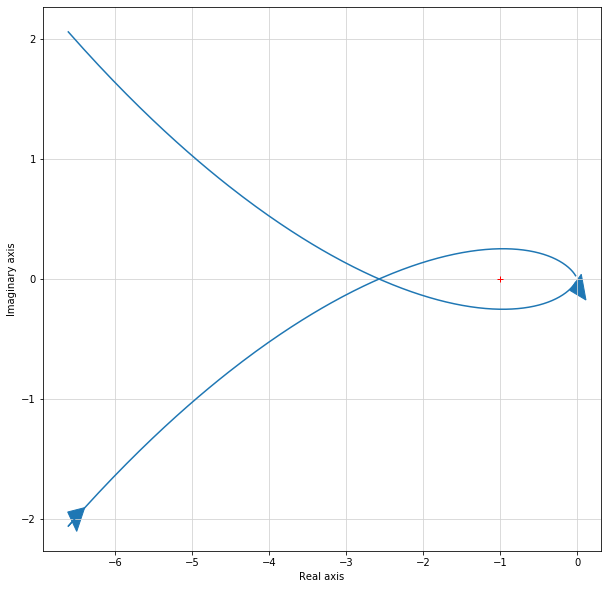

In [8]:
from control.matlab import *
import matplotlib.pyplot as plt
import numpy as np
SIZE=(10,10)

w1=tf([5],[1e-15,1])
w2=tf([1],[8,1])
w4=tf([24],[8,1])
w3=tf([0.01*2,1],[0.05*8,1])
w5=series(w2,w3,w4)
w6=feedback(w5,w1,-1)
print(w6)
#pzmap(w6)

#Grafiki(w6)

Nyquist(w5,w1)

#Gurvic(w6,True)
#Mihailov_func(w6)

# Определение границы устойчивости

In [61]:
# переобор значений Koc

def Poisk(nachalo,konec):
    tochnost=1
    flag=True
    while tochnost > 0.0000001:
        k_oc = np.linspace(nachalo,konec,num=10)
        opredeliteli=[]
        #print(k_oc)
        for i in k_oc:
            w1=tf([i],[1e-15,1])
            w6=feedback(w5,w1,-1)
            b=Gurvic(w6,False)
            opredeliteli.append(b)
        for i in range(0,len(opredeliteli)-1):
            if (opredeliteli[i+1] < 0 and opredeliteli[i] > 0) or (opredeliteli[i+1] > 0 and opredeliteli[i] < 0):
                nachalo=k_oc[i]
                konec=k_oc[i+1]
                #print(opredeliteli[i])
                tochnost=abs((opredeliteli[i]-opredeliteli[i+1])/2)
                #print(nachalo)
                flag=False
        if flag:
            nachalo=nachalo-10
            konec=konec+10
    return(nachalo)

k_oc=Poisk(2,4)

print(k_oc)


1.9444444444399207


[2.5600000000000003e-14, 25.600000000000072, 70.40000000000002, 16.88, 25.0]
0j


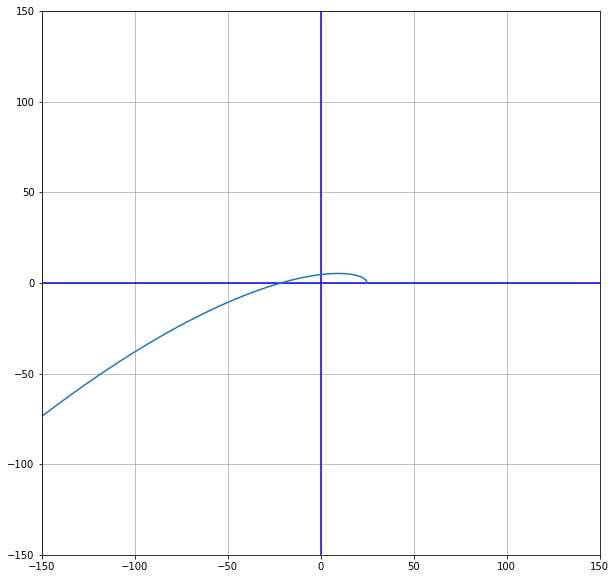

In [67]:

w1=tf([1],[1e-15,1])
w6=feedback(w5,w1,-1)
#pzmap(w6)
#Grafiki(w6)

#Nyquist(w5,w1)

#Gurvic(w6,True)
Mihailov_func(w6)

[2.5600000000000003e-14, 25.600000000000072, 70.40000000000002, 17.33333333333116, 47.6666666665581]
0j


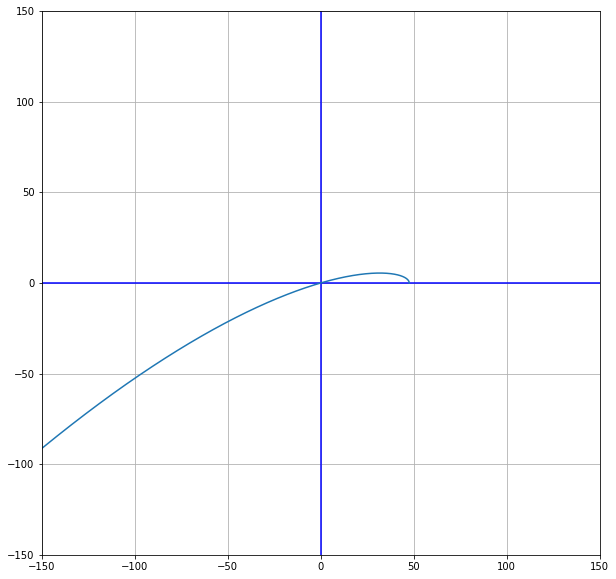

In [68]:

w1=tf([k_oc],[1e-15,1])
w6=feedback(w5,w1,-1)
#pzmap(w6)
#rafiki(w6)

#Nyquist(w5,w1)

#Gurvic(w6,True)
Mihailov_func(w6)